In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import math
import random

In [2]:

#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

def method_one(count, r1, r2):
    x_values = []
    y_values = []
    for i in range (count):
        rand_radius = random.uniform(r1, r2)
        rand_angle = random.uniform(0, math.pi*2)
        x_values.append(rand_radius * math.cos(rand_angle)) 
        y_values.append(rand_radius * math.sin(rand_angle))
    return [x_values, y_values]

def method_two(count, wavelength, amplitude, x_bound, y_bound, y_below):
    x_values = []
    y_values = []
    for i in range (count):
        rand_x = random.uniform(-x_bound, x_bound)
        rand_y = 0
        if(y_below == 1):
            rand_y = random.uniform(-y_bound, (math.cos(rand_x / wavelength) * amplitude))
        else:
            rand_y = random.uniform(y_bound, (math.cos(rand_x / wavelength) * amplitude))
        x_values.append(rand_x) 
        y_values.append(rand_y)
    return [x_values, y_values]

def method_three(count, r1, r2, x, y):
    x_values = []
    y_values = []
    for i in range (count):
        rand_radius = random.uniform(r1, r2)
        rand_angle = random.uniform(0, math.pi*2)
        x_values.append(x + rand_radius * math.cos(rand_angle)) 
        y_val = y + rand_radius * math.sin(rand_angle)
        if(x_values[i] > (x + ((r1 + r2) / 2))):
            y_val += random.uniform(0, (r1 / 2))
        y_values.append(y + rand_radius * math.sin(rand_angle))
    return [x_values, y_values]

In [3]:

    
SAMPLE_SIZE = 100

#generated_pos_values = method_one(SAMPLE_SIZE, 5, 8) 
#generated_pos_values = method_two(SAMPLE_SIZE, 3, 10, 20, 20, 1) 
generated_pos_values = method_three(SAMPLE_SIZE, .01, 5, 4, 3) 


#df_pos = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=SAMPLE_SIZE),
#                       'Y': np.random.uniform(low=-5, high=0, size=SAMPLE_SIZE)})
df_pos = pd.DataFrame({'X': generated_pos_values[0],
                       'Y': generated_pos_values[1]})

#print (generated_values[0])
pos_label = []
for i in range (SAMPLE_SIZE):
    pos_label.append(1)
df_pos['Label'] = pos_label

#generated_neg_values = method_one(SAMPLE_SIZE, 1, 5.5) 
#generated_neg_values = method_two(SAMPLE_SIZE, 3, 14, 20, 20, 0) 
generated_neg_values = method_three(SAMPLE_SIZE, .01, 6, -3, -3) 
                        
df_neg = pd.DataFrame({'X': generated_neg_values[0],
                       'Y': generated_neg_values[1]})

neg_label = []
for i in range (SAMPLE_SIZE):
    neg_label.append(-1)
df_neg['Label'] = neg_label

df = pd.concat([df_neg, df_pos])
X = df[['X', 'Y']]
y = df['Label']



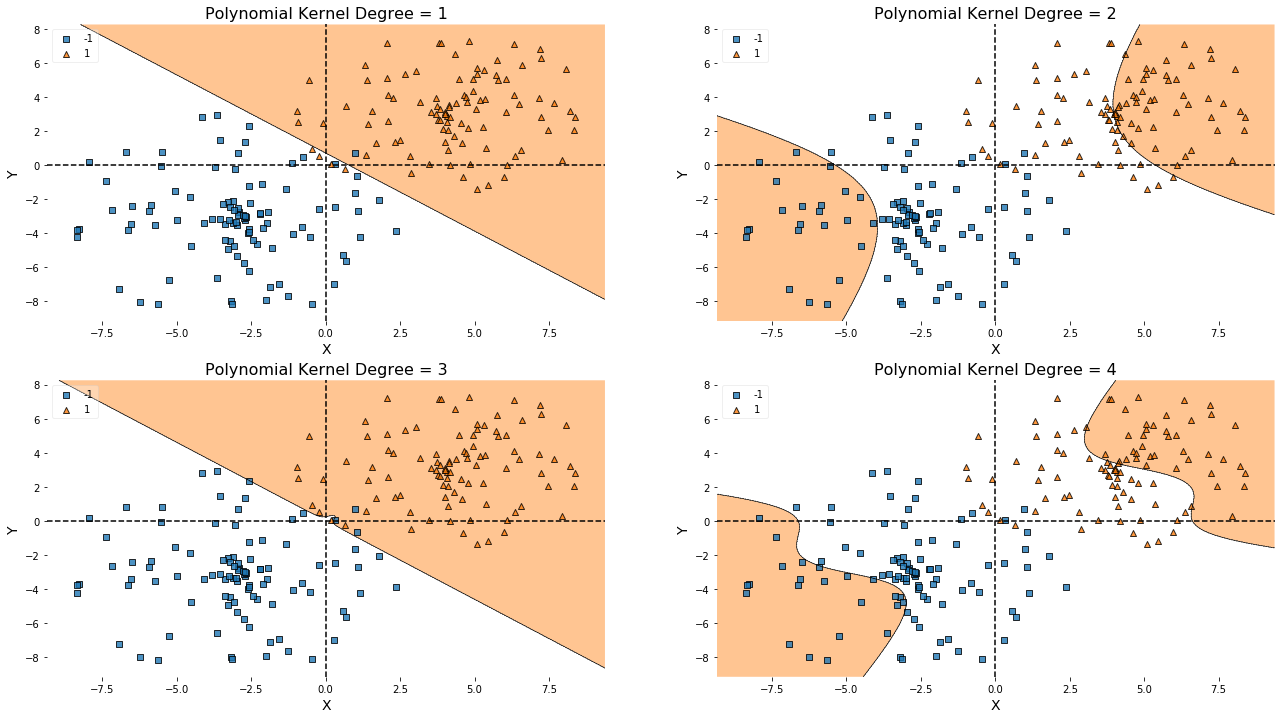

In [4]:
clf_poly1 = svm.SVC(kernel='poly', degree = 1, gamma = 1)
clf_poly1.fit(X.values, y.values) 
clf_poly2 = svm.SVC(kernel='poly', degree = 2, gamma = 1)
clf_poly2.fit(X.values, y.values) 
clf_poly3 = svm.SVC(kernel='poly', degree = 3, gamma = 1)
clf_poly3.fit(X.values, y.values)  
clf_poly4 = svm.SVC(kernel='poly', degree = 4, gamma = 1)
clf_poly4.fit(X.values, y.values) 
#clf_poly9 = svm.SVC(kernel='poly', degree = 5, gamma = 1)
#clf_poly9.fit(X.values, y.values) 
#clf_poly10 = svm.SVC(kernel='poly', degree = 6, gamma = 1)
#clf_poly10.fit(X.values, y.values) 


plt.figure(figsize=(22,12))
dims = [2,2]

#XOR SVM Decision Region Boundary
define_plot(clf_poly1, X, y, "Polynomial Kernel Degree = 1", 1, dims)
define_plot(clf_poly2, X, y, "Polynomial Kernel Degree = 2", 2, dims)
define_plot(clf_poly3, X, y, "Polynomial Kernel Degree = 3", 3, dims)
define_plot(clf_poly4, X, y, "Polynomial Kernel Degree = 4", 4, dims)
#define_plot(clf_poly9, X, y, "Polynomial Kernel Degree = 5", 5, dims)
#define_plot(clf_poly10, X, y, "Polynomial Kernel Degree = 6", 6, dims)

In [5]:
print("accuracy for degree = 1: " + str(clf_poly1.score(X.values, y.values)*100 )+ "%")
print("accuracy for degree = 2: " + str(clf_poly2.score(X.values, y.values)*100 )+ "%")
print("accuracy for degree = 3: " + str(clf_poly3.score(X.values, y.values)*100 )+ "%")
print("accuracy for degree = 4: " + str(clf_poly4.score(X.values, y.values)*100 )+ "%")

accuracy for degree = 1: 97.5%
accuracy for degree = 2: 64.5%
accuracy for degree = 3: 98.0%
accuracy for degree = 4: 58.5%


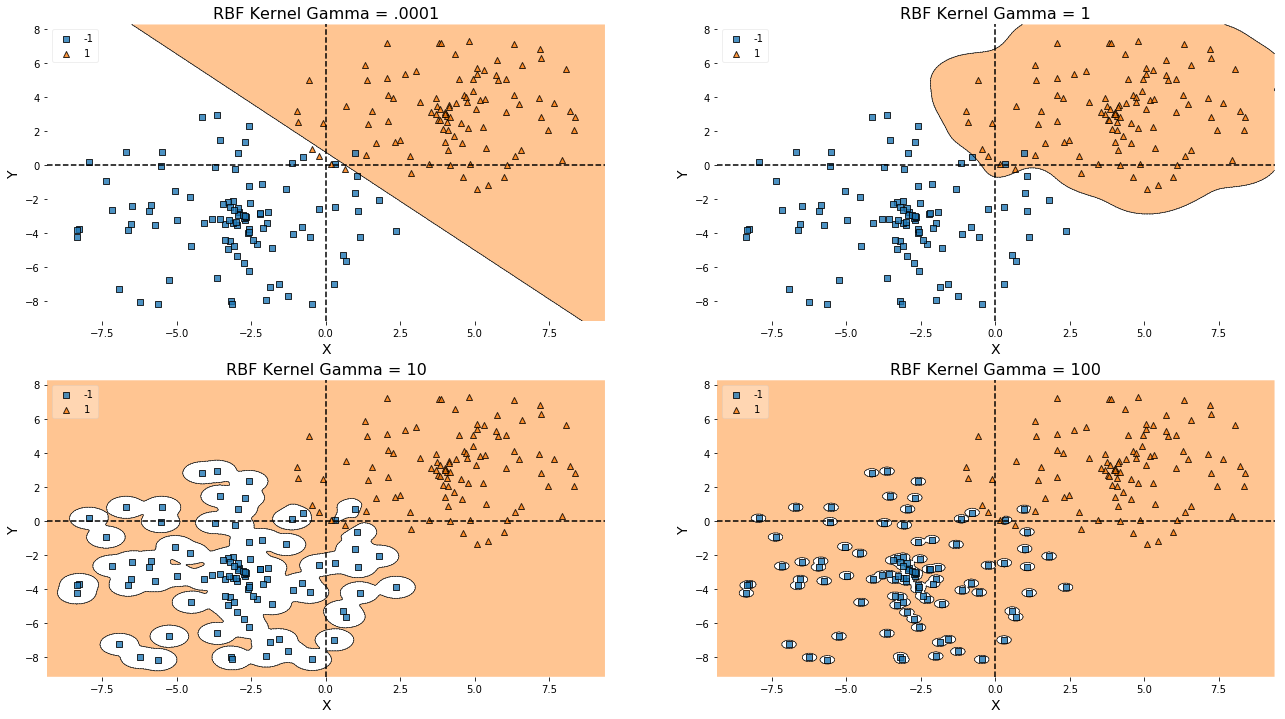

In [10]:
clf_rbf1 = svm.SVC(kernel='rbf', gamma = .01)
clf_rbf1.fit(X.values, y.values)
clf_rbf2 = svm.SVC(kernel='rbf', gamma = .0001)
clf_rbf2.fit(X.values, y.values)
clf_rbf3 = svm.SVC(kernel='rbf', gamma = 1)
clf_rbf3.fit(X.values, y.values)
clf_rbf4 = svm.SVC(kernel='rbf', gamma = 10)
clf_rbf4.fit(X.values, y.values)
clf_rbf5 = svm.SVC(kernel='rbf', gamma = 100)
clf_rbf5.fit(X.values, y.values)

plt.figure(figsize=(22,12))
dims = [2,2]

define_plot(clf_rbf2, X, y, "RBF Kernel Gamma = .0001", 1, dims)
define_plot(clf_rbf3, X, y, "RBF Kernel Gamma = 1", 2, dims)
define_plot(clf_rbf4, X, y, "RBF Kernel Gamma = 10", 3, dims)
define_plot(clf_rbf5, X, y, "RBF Kernel Gamma = 100", 4, dims)

In [11]:
print("accuracy for gamma = .0001: " + str(clf_rbf2.score(X.values, y.values)*100 )+ "%")
print("accuracy for gamma = 1: " + str(clf_rbf3.score(X.values, y.values)*100 )+ "%")
print("accuracy for gamma = 10: " + str(clf_rbf4.score(X.values, y.values)*100 )+ "%")
print("accuracy for gamma = 100: " + str(clf_rbf5.score(X.values, y.values)*100 )+ "%")

accuracy for gamma = .0001: 97.5%
accuracy for gamma = 1: 99.0%
accuracy for gamma = 10: 100.0%
accuracy for gamma = 100: 100.0%


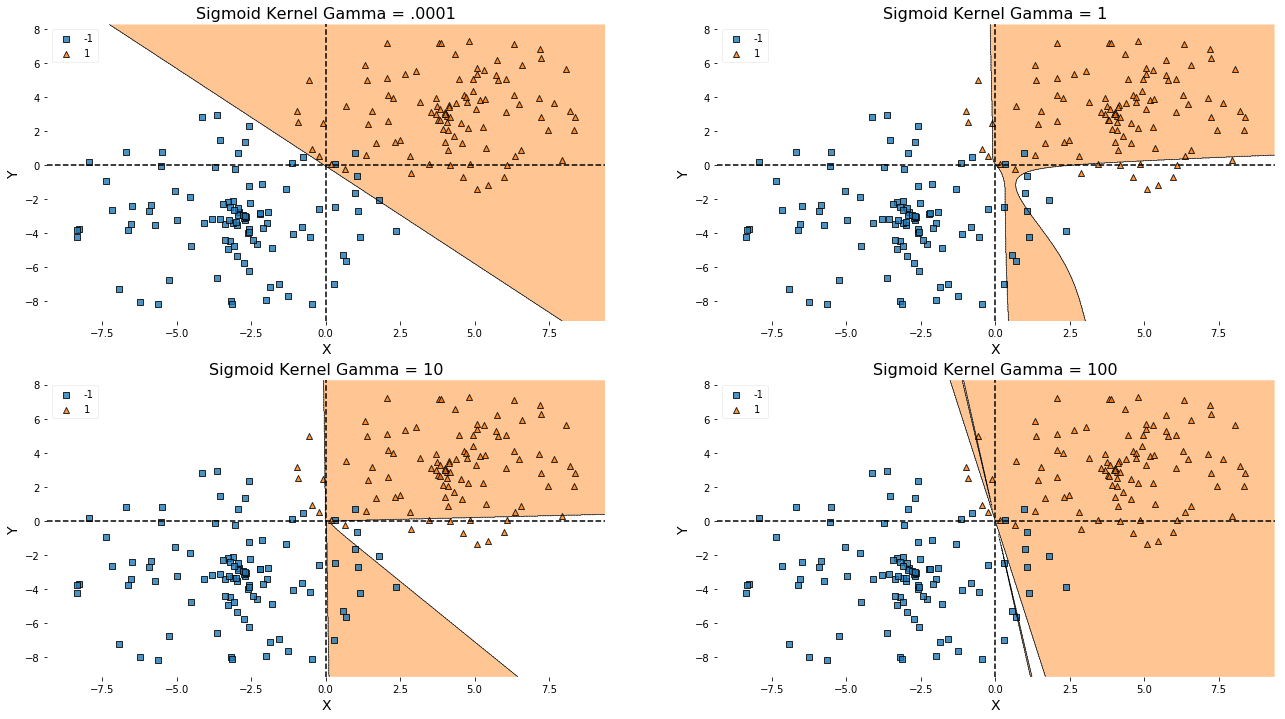

In [8]:
clf_sigmoid1 = svm.SVC(kernel='sigmoid', gamma = .0001)
clf_sigmoid1.fit(X.values, y.values)
clf_sigmoid2 = svm.SVC(kernel='sigmoid', gamma = 1)
clf_sigmoid2.fit(X.values, y.values)
clf_sigmoid3 = svm.SVC(kernel='sigmoid', gamma = 10)
clf_sigmoid3.fit(X.values, y.values)
clf_sigmoid4 = svm.SVC(kernel='sigmoid', gamma = 100)
clf_sigmoid4.fit(X.values, y.values)

plt.figure(figsize=(22,12))
dims = [2,2]

define_plot(clf_sigmoid1, X, y, "Sigmoid Kernel Gamma = .0001", 1, dims)
define_plot(clf_sigmoid2, X, y, "Sigmoid Kernel Gamma = 1", 2, dims)
define_plot(clf_sigmoid3, X, y, "Sigmoid Kernel Gamma = 10", 3, dims)
define_plot(clf_sigmoid4, X, y, "Sigmoid Kernel Gamma = 100", 4, dims)

In [12]:
print("accuracy for gamma = .0001: " + str(clf_sigmoid1.score(X.values, y.values)*100 )+ "%")
print("accuracy for gamma = 1: " + str(clf_sigmoid2.score(X.values, y.values)*100 )+ "%")
print("accuracy for gamma = 10: " + str(clf_sigmoid3.score(X.values, y.values)*100 )+ "%")
print("accuracy for gamma = 100: " + str(clf_sigmoid4.score(X.values, y.values)*100 )+ "%")

accuracy for gamma = .0001: 98.0%
accuracy for gamma = 1: 89.0%
accuracy for gamma = 10: 86.5%
accuracy for gamma = 100: 94.0%
